<ipython-input-1-e497a1b093d2>:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


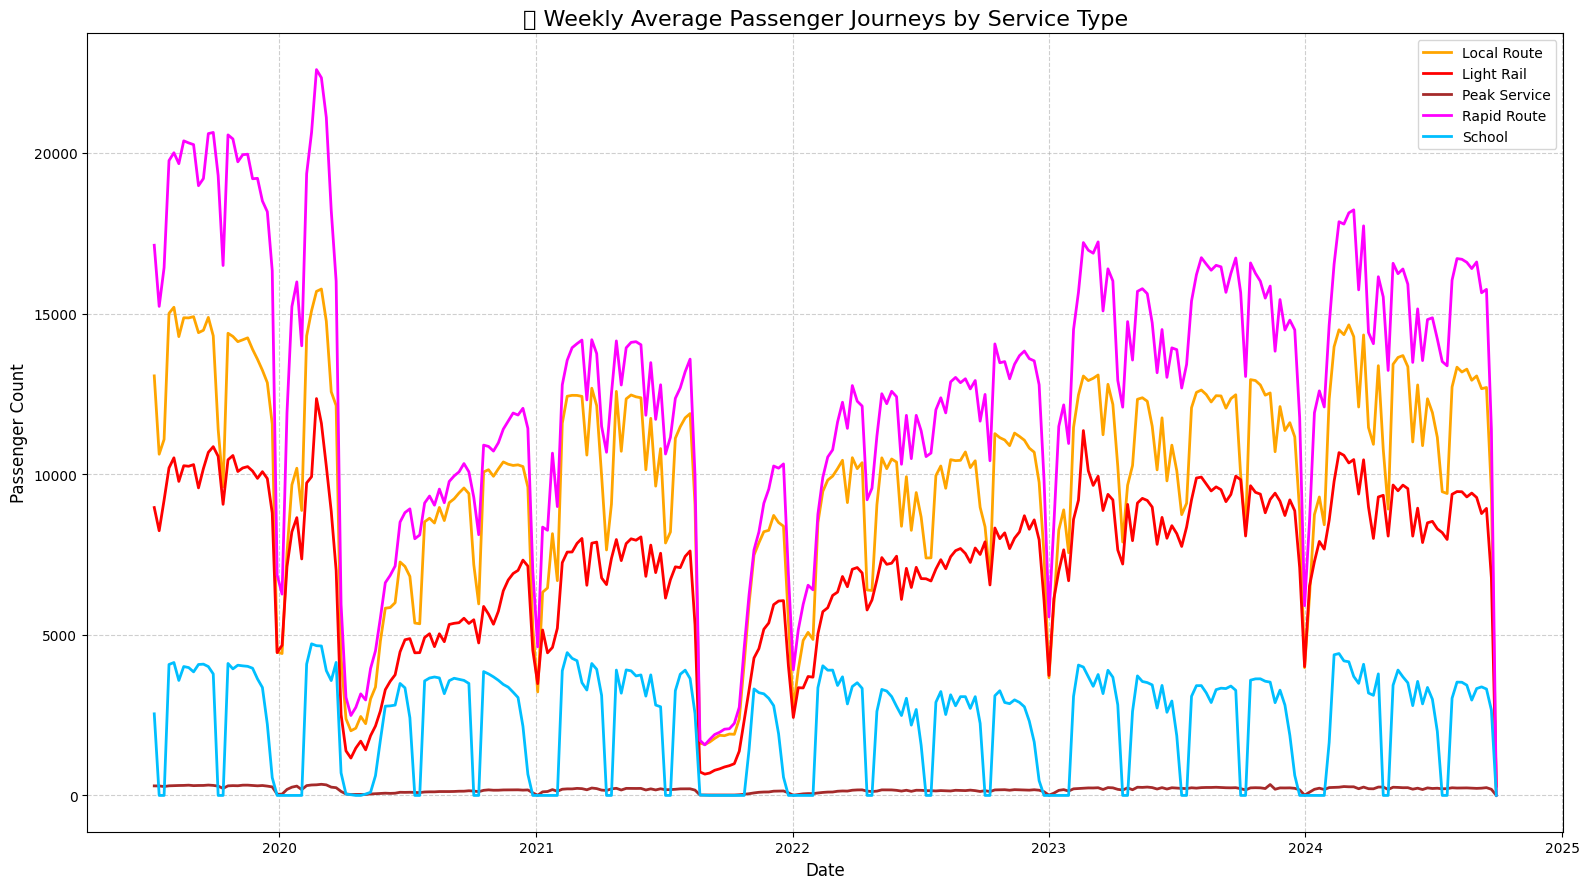

DEBUG:cmdstanpy:input tempfile: /tmp/tmpttns_njl/hb1ykgg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpttns_njl/yphaeybn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17001', 'data', 'file=/tmp/tmpttns_njl/hb1ykgg7.json', 'init=/tmp/tmpttns_njl/yphaeybn.json', 'output', 'file=/tmp/tmpttns_njl/prophet_modeli19hffsd/prophet_model-20250527060058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:00:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:00:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpttns_njl/jw6rcv5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpttns_njl/_8ujrzc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


📊 7-Day Forecast:

            Local Route  Light Rail  Peak Service  Rapid Route  School
Date                                                                  
2024-09-30        10605        7591           224        13476    1418
2024-10-01        12401        8645           270        15584    1842
2024-10-02        12566        8687           270        15672    1903
2024-10-03        12416        8606           243        15484    1805
2024-10-04        11888        8636           191        14778    1623
2024-10-05         2740        5172             0         6593       0
2024-10-06         1816        3815             0         5145       0


<ipython-input-1-e497a1b093d2>:71: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


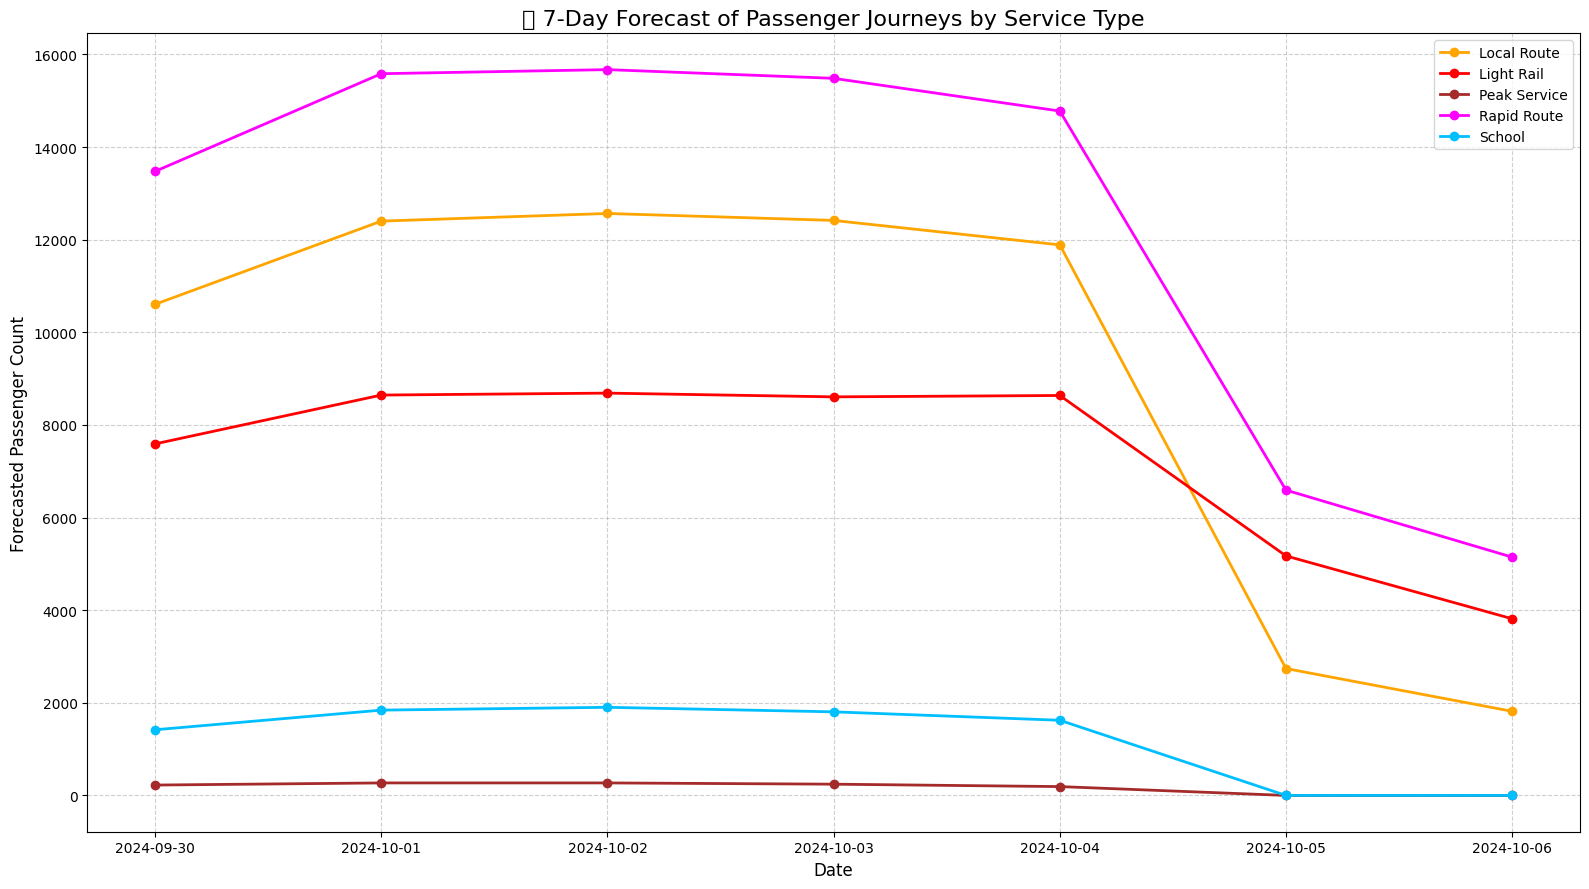

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250527.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df.set_index('Date', inplace=True)


services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']


colors = {
    'Local Route': 'orange',
    'Light Rail': 'red',
    'Peak Service': 'brown',
    'Rapid Route': 'magenta',
    'School': 'deepskyblue'
}

weekly_avg = df.resample('W').mean()

plt.figure(figsize=(16, 9))
for service in services:
    plt.plot(weekly_avg.index, weekly_avg[service], label=service, color=colors[service], linewidth=2)

plt.title('Weekly Average Passenger Journeys by Service Type', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Forecast
def forecast_with_prophet(df, column):
    ts = df[[column]].reset_index()
    ts.columns = ['ds', 'y']
    model = Prophet(daily_seasonality=True, weekly_seasonality=True)
    model.fit(ts)
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    result = forecast[['ds', 'yhat']].tail(7).copy()
    result['yhat'] = result['yhat'].apply(lambda x: max(0, round(x)))
    return result


forecast_data = {}
for col in services:
    forecast_data[col] = forecast_with_prophet(df, col)

result_df = forecast_data[services[0]].copy()
result_df.columns = ['Date', services[0]]
for col in services[1:]:
    result_df[col] = forecast_data[col]['yhat'].values
result_df.set_index('Date', inplace=True)

print("\n 7-Day Forecast:\n")
print(result_df)

plt.figure(figsize=(16, 9))
for col in services:
    plt.plot(result_df.index, result_df[col], label=col, color=colors[col], linewidth=2, marker='o')

plt.title('7-Day Forecast of Passenger Journeys by Service Type', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Forecasted Passenger Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
